# Airline On-Time Statistics and Delay Causes
## by (Yasmine Hussein)

## Investigation Overview

> This analysis is to view the data and find the correlation between cancelled and delayed causes, what are the most frequent cities with most canceled and delayed records, what is the most carrier that has frequent flights.

## Dataset Overview

>The dataset has 6087 observation and 22 variable This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 2019 to 2021.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# loading the dataset
df = pd.read_csv('airline_delay_causes.csv')
print(df.describe())
print(df.info())
df

               year         month   arr_flights     arr_del15    carrier_ct  \
count  41373.000000  41373.000000  41268.000000  41093.000000  41268.000000   
mean    2019.531627      6.217557    302.215252     45.169129     13.516774   
std        0.569917      3.574739    874.927770    139.054171     36.072013   
min     2019.000000      1.000000      1.000000      0.000000      0.000000   
25%     2019.000000      3.000000     34.000000      4.000000      1.000000   
50%     2019.000000      6.000000     82.000000     11.000000      4.000000   
75%     2020.000000      9.000000    199.000000     30.000000     10.772500   
max     2021.000000     12.000000  21873.000000   3714.000000    966.330000   

         weather_ct        nas_ct   security_ct  late_aircraft_ct  \
count  41268.000000  41268.000000  41268.000000      41268.000000   
mean       1.638711     14.462094      0.105219         15.254839   
std        5.705007     53.445779      0.532847         52.138189   
min        0

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2019,1,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",65.0,15.0,3.41,0.71,...,6.56,1.0,1.0,601.0,180.0,29.0,129.0,0.0,263.0,NaN
1,2019,1,MQ,Envoy Air,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",61.0,18.0,2.70,1.01,...,5.37,1.0,0.0,890.0,180.0,36.0,383.0,0.0,291.0,NaN
2,2019,1,MQ,Envoy Air,SGF,"Springfield, MO: Springfield-Branson National",428.0,80.0,13.31,5.18,...,34.09,15.0,0.0,3954.0,705.0,213.0,982.0,0.0,2054.0,NaN
3,2019,1,MQ,Envoy Air,SHV,"Shreveport, LA: Shreveport Regional",174.0,28.0,5.97,1.17,...,9.72,0.0,0.0,1655.0,360.0,55.0,268.0,0.0,972.0,NaN
4,2019,1,MQ,Envoy Air,SJT,"San Angelo, TX: San Angelo Regional/Mathis Field",135.0,23.0,10.78,0.35,...,5.33,2.0,0.0,835.0,320.0,27.0,192.0,0.0,296.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41368,2019,9,UA,United Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",338.0,55.0,20.95,0.39,...,18.97,1.0,1.0,3215.0,1349.0,37.0,561.0,0.0,1268.0,NaN
41369,2019,9,UA,United Air Lines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",684.0,96.0,19.74,4.58,...,57.27,10.0,0.0,6266.0,1229.0,272.0,456.0,0.0,4309.0,NaN
41370,2019,9,UA,United Air Lines Inc.,BDL,"Hartford, CT: Bradley International",170.0,17.0,4.35,1.03,...,5.96,2.0,0.0,656.0,157.0,107.0,195.0,0.0,197.0,NaN
41371,2019,9,UA,United Air Lines Inc.,BGR,"Bangor, ME: Bangor International",4.0,1.0,0.00,0.00,...,0.00,0.0,0.0,15.0,0.0,0.0,15.0,0.0,0.0,NaN


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> From the first visualization we found out that the most carriers with most flights are:

UA -> United Air Lines Inc.
OO -> SkyWest Airlines Inc

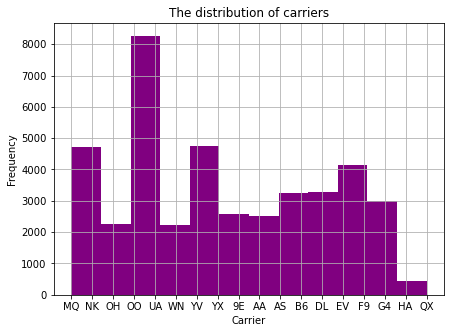

In [3]:
#plotting frequency of carrier per flights
df.carrier.hist(color='purple', bins=12, figsize=(7,5));
plt.title("The distribution of carriers")
plt.xlabel('Carrier')
plt.ylabel('Frequency');

## (Visualization 2)

> we found that 2019 has the most delayed flights as well!, and 2021 is the least!

<Figure size 1080x360 with 0 Axes>

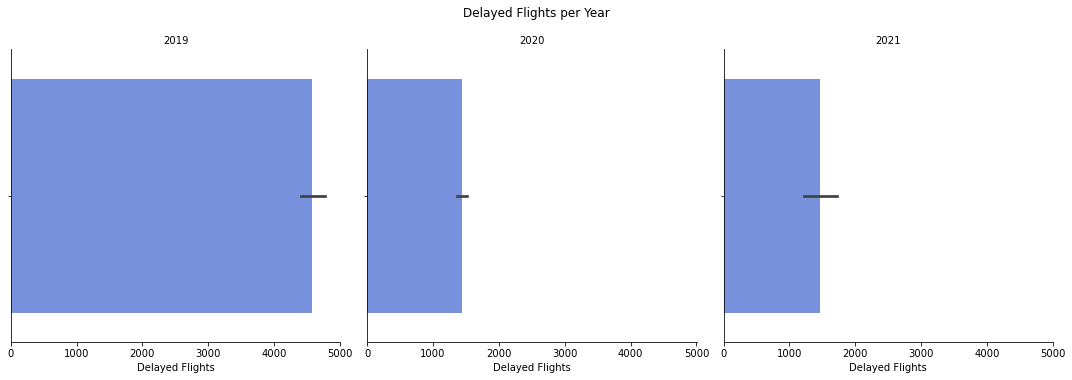

In [4]:
#plotting delayed flights per year
plt.figure(figsize = [15, 5])
g = sb.catplot(data=df, x=' arr_delay', col="year", kind='bar',
            color = sb.set_palette("coolwarm"))
g.set_xlabels("Delayed Flights")
g.set_titles("{col_name}")
g.fig.suptitle('Delayed Flights per Year', y=1.05);

## (Visualization 3)


what was really excited to notice is that the security delay and cancellation has the highest number of mins, and it's the least frequent cause of delay or cancellation.

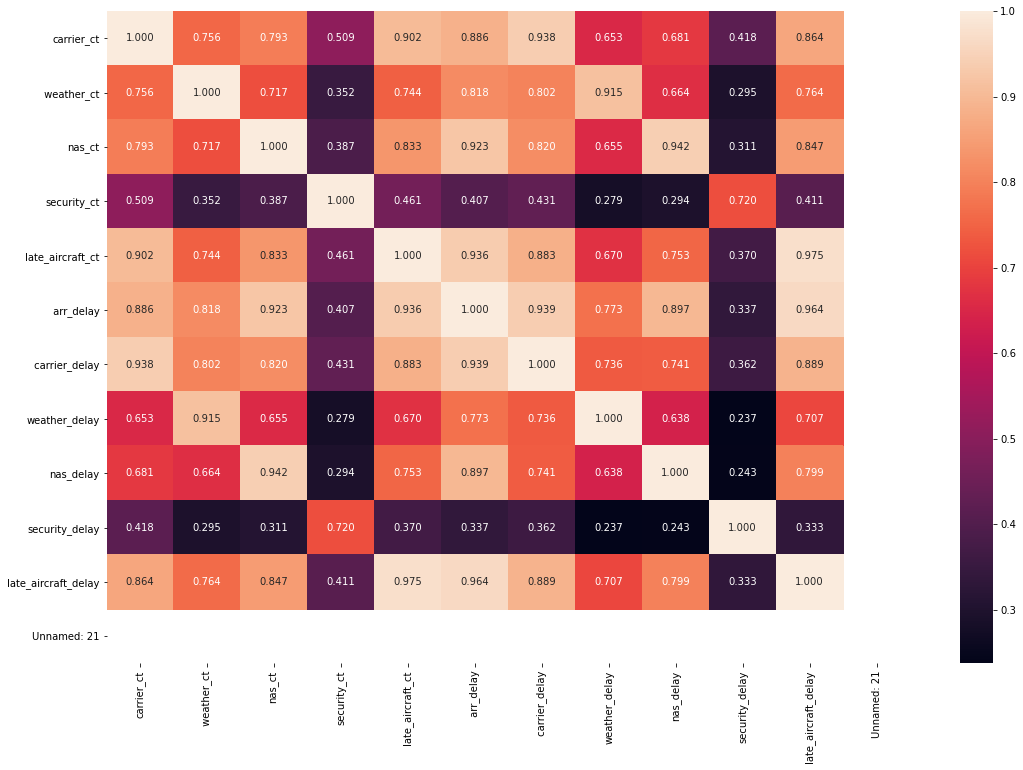

In [5]:
# find correlation between columns
# drop unneccessary columns
new_df = df.drop(['year',' month','carrier','carrier_name','airport','airport_name','arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted'],axis=1)
new_df = new_df.corr()
plt.figure(figsize=(18,12))
sb.heatmap(new_df, annot=True, fmt = '.3f',color = sb.set_palette("mako"))
plt.show();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!